In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("student_dataset_v1.csv")
data.head()

,Student_Names,Phone_No.,Gender,Study_Hours,Part_Time_Job,Math,Physics,Chemistry,Grade,Comment,Course_Recommendation,CourseCode,ListofCourses,RatingOfCourses
0,Santanika Sonkar,9906433252,Male,5,No,82,51,36,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",01_CSE,B.E/B.Tech in Computer Science & Engineering,5.0
1,Swaroop Pandey,9724400276,Female,4,Yes,42,46,40,D,Poor Pursuance,Better luck next time,02_CSAI,B.E/B.Tech in Computer Science & Engineering (AI),4.5
2,Vaijinath Sonkar,9866358126,Male,10,Yes,36,55,48,D,Poor Pursuance,Better luck next time,03_CSDS,B.E/B.Tech in Computer Science & Engineering (...,5.0
3,Roop Lal Kumari,9657626856,Male,8,No,71,67,34,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",04_CSR,B.E/B.Tech in Computer Science & Engineering (...,3.0
4,जयराम Maurrya,9804752911,Male,9,Yes,85,92,36,B+,Good Pursuance,"02_CSAI, 32_BC, 35_BSC",05_CSECS,B.E/B.Tech in Computer Science & Engineering (...,4.5


In [9]:
# Remove the 'Student_Names' column from the dataframe
if 'Student_Names' in data.columns:
    data = data.drop(columns=['Student_Names'])
data.head()

,Phone_No.,Gender,Study_Hours,Part_Time_Job,Math,Physics,Chemistry,Grade,Comment,Course_Recommendation,CourseCode,ListofCourses,RatingOfCourses
0,9906433252,Male,5,No,82,51,36,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",01_CSE,B.E/B.Tech in Computer Science & Engineering,5.0
1,9724400276,Female,4,Yes,42,46,40,D,Poor Pursuance,Better luck next time,02_CSAI,B.E/B.Tech in Computer Science & Engineering (AI),4.5
2,9866358126,Male,10,Yes,36,55,48,D,Poor Pursuance,Better luck next time,03_CSDS,B.E/B.Tech in Computer Science & Engineering (...,5.0
3,9657626856,Male,8,No,71,67,34,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",04_CSR,B.E/B.Tech in Computer Science & Engineering (...,3.0
4,9804752911,Male,9,Yes,85,92,36,B+,Good Pursuance,"02_CSAI, 32_BC, 35_BSC",05_CSECS,B.E/B.Tech in Computer Science & Engineering (...,4.5


In [10]:
# Display the count of missing values in each column
print(data.isnull().sum())

Phone_No.                   0
Gender                      0
Study_Hours                 0
Part_Time_Job               0
Math                        0
Physics                     0
Chemistry                   0
Grade                       0
Comment                     0
Course_Recommendation       0
CourseCode               8928
ListofCourses            8928
RatingOfCourses          8928
dtype: int64


📊 Confusion Matrix:
[[1241    0]
 [   0  109]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1241
           1       1.00      1.00      1.00       109

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350

Precision: 1.00
Recall: 1.00


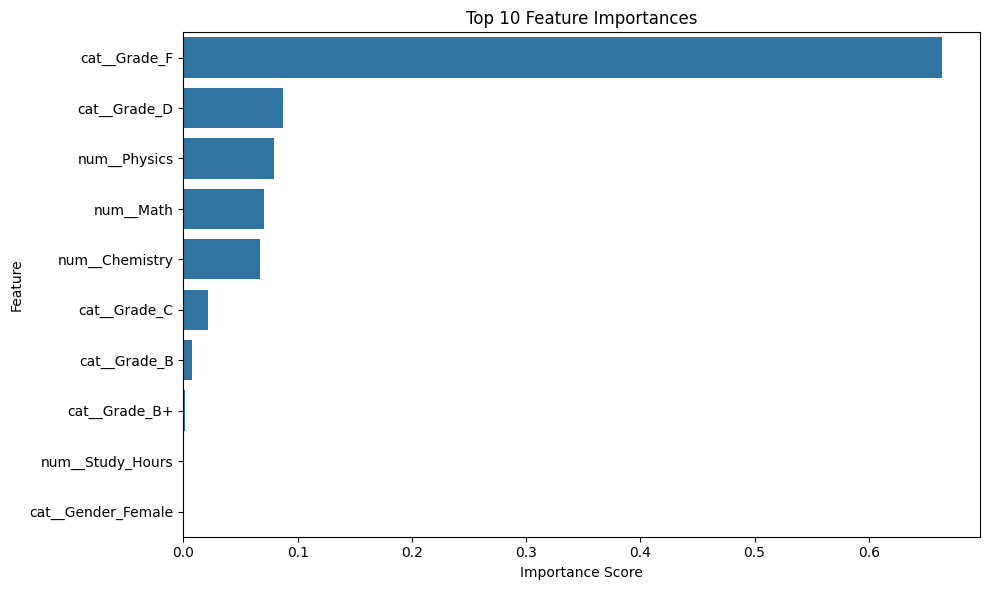

In [17]:
# Student Dropout Prediction with Random Forest (scikit-learn)

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
# Replace with your actual dataset path
df = pd.read_csv("student_dataset_v1.csv")

# 3. Encode Target Variable
df['dropout'] = df['Comment'].apply(lambda x: 1 if x == 'Failed' else 0)


# 4. Define Features and Target
# Correcting the assignment of features and target variable
X = df.drop(['dropout', 'Comment', 'Student_Names', 'Phone_No.', 'Course_Recommendation', 'CourseCode', 'ListofCourses'], axis=1) # Dropping original target and potentially irrelevant columns
y = df['dropout']

# 5. Identify Feature Types
numerical = ['Study_Hours', 'Math', 'Physics', 'Chemistry', 'RatingOfCourses']
categorical = ['Gender', 'Part_Time_Job', 'Grade'] # 'Comment' is removed as it is the target

# 6. Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# 7. Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

# 8. Build Pipeline with Random Forest
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

# 9. Train Model
pipeline.fit(X_train, y_train)

# 10. Evaluate Model
y_pred = pipeline.predict(X_test)

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

# 11. Feature Importance (Optional)
model = pipeline.named_steps['classifier']
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()